# Deep Learning

A Neural Network **backward and forward pass propagation** implementation using sigmoid function as the **activate function**. For simplicity's sake the model is made of **2 layers** and **6 nodes** in total. The code provided below can be used for training and runing a Neural Network. 

**Layer<sub>1<sub>**: 5 Nodes
<br>
**Layer<sub>2<sub>**: 1 Node
## Goal

A binary classification task to recognize handwritten digits, zero and one. 

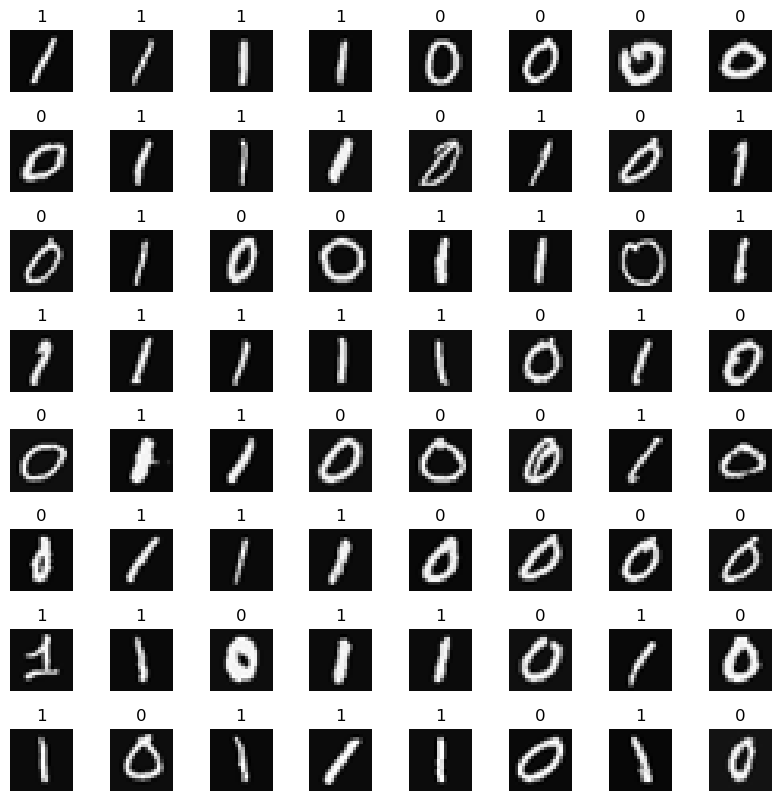

## Variables

**X<sub>j</sub>**: Grayscale of the j-ith pixel in the image. The image is 20-pixel x 20-pixel 

**Y**: 1 if number is a one, 0 otherwise (is a zero)

## Credits

This problem was taken from the <a href="https://www.coursera.org/specializations/machine-learning-introduction?" target="_blank">Machine Learning Specialization</a> offered by Stanford University at Coursera. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from implementations import sigmoid

In [2]:
W1_J = 400
W1_I = 5

W2_J = 5
W2_I = 1

In [3]:
def load_data():
    X = np.load("samples/handwritten-digit-recognition-X.npy")
    y = np.load("samples/handwritten-digit-recognition-y.npy")
    X = X[0:1000]
    y = y[0:1000]
    y = y.astype(float)
    return X, y

In [4]:
def dense(A_in, W, b):
    return sigmoid(np.matmul(A_in, W) + b)

In [5]:
# Hardcoded version with layers containg (We could generalize)
# Layer 1 (Input = 400, Nodes = 5)
# Layer 2 (Input = 5, Nodes = 1)
def create_layers_weights():
    W1 = np.zeros((400, 5))
    b1 = np.zeros((5,))
    W2 = np.zeros((5, 1))
    b2 = np.zeros((1,))
    
    return W1, b1, W2, b2 

In [6]:
def my_sequential(W1, b1, W2, b2, a_in):
    a1_in = dense(a_in, W1, b1)
    output = dense(a1_in, W2, b2)
    
    return output

In [7]:
def compute_cost(X, y, W1, b1, W2, b2):
    layer0_m = X.shape[0]
    
    layer1_A = sigmoid(np.dot(X, W1) + b1)
    layer2_A = sigmoid(np.dot(layer1_A, W2) + b2)
    
    loss = (-y * np.log(layer2_A)) - ((1 - y) * np.log(1 - layer2_A))
    total_cost = np.sum(loss) / layer0_m
    
    return total_cost

In [8]:
def compute_gradient(X, y, W1, b1, W2, b2):
    layer0_m = X.shape[0]
    
    layer1_dj_dw = np.zeros((W1_J, W1_I))
    layer1_dj_db = np.zeros(b1.shape)
    layer2_dj_dw = np.zeros(W2.shape)
    layer2_dj_db = np.zeros(b2.shape)

    
    layer1_fwb_x = sigmoid(np.matmul(X, W1) + b1)
    layer1_dj_db_b = layer1_fwb_x - y
    layer1_dj_db = np.sum(layer1_dj_db_b, axis=0) / layer0_m
    layer1_dj_dw = np.dot(layer1_dj_db_b.T, X) / layer0_m

    layer1_X = dense(X, W1, b1)
    layer1_m = layer1_X.shape[0]
    
    layer2_fwb_x = sigmoid(np.matmul(layer1_X, W2) + b2)
    layer2_dj_db_b = layer2_fwb_x - y
    layer2_dj_db = np.sum(layer2_dj_db_b, axis=0) / layer1_m
    layer2_dj_dw = np.dot(layer2_dj_db_b.T, layer1_X) / layer1_m

    return layer1_dj_dw.T, layer1_dj_db.T, layer2_dj_dw.T, layer2_dj_db.T


In [9]:
def compute_gradient_descent(X, y, W1, b1, W2, b2, alpha, iterations):
    j_hist = []
    
    for idx in range(iterations):
        W1_dj_dw, b1_dj_db, W2_dj_dw, b2_dj_db = compute_gradient(X, y, W1, b1, W2, b2)
    
        W1 = W1 - 0.1 * W1_dj_dw
        b1 = b1 - 0.1 * b1_dj_db
        W2 = W2 - 0.1 * W2_dj_dw
        b2 = b2 - 0.1 * b2_dj_db

        
        if ((idx + 1) % 10 == 0 or idx == 0):
            cost = compute_cost(X, y, W1, b1, W2, b2)
            
            j_hist.append(cost)
            
            if ((idx + 1) % 1000 == 0 or idx == 0):
                print(f"Iteration {(idx + 1):6} | Cost {cost:8.2f}")

    return W1, b1, W2, b2

In [10]:
def evaluate(W1, b1, W2, b2, x_train):
    return 1 if my_sequential(W1, b1, W2, b2, x_train) >= .05 else 0

In [11]:
X_train, y_train = load_data()
W1_in, b1_in, W2_in, b2_in = create_layers_weights()
alpha = 0.1
iterations = 5000

W1, b1, W2, b2 = compute_gradient_descent(X_train, y_train, W1_in, b1_in, W2_in, b2_in, alpha, iterations)

Iteration      1 | Cost     0.69
Iteration   1000 | Cost     0.02
Iteration   2000 | Cost     0.01
Iteration   3000 | Cost     0.01
Iteration   4000 | Cost     0.01
Iteration   5000 | Cost     0.00


## Results

Now, after training the model, lets see if it is working properly. Above the handwritten number image there are two numbers,
the first one is the y response, the second one is the model output.

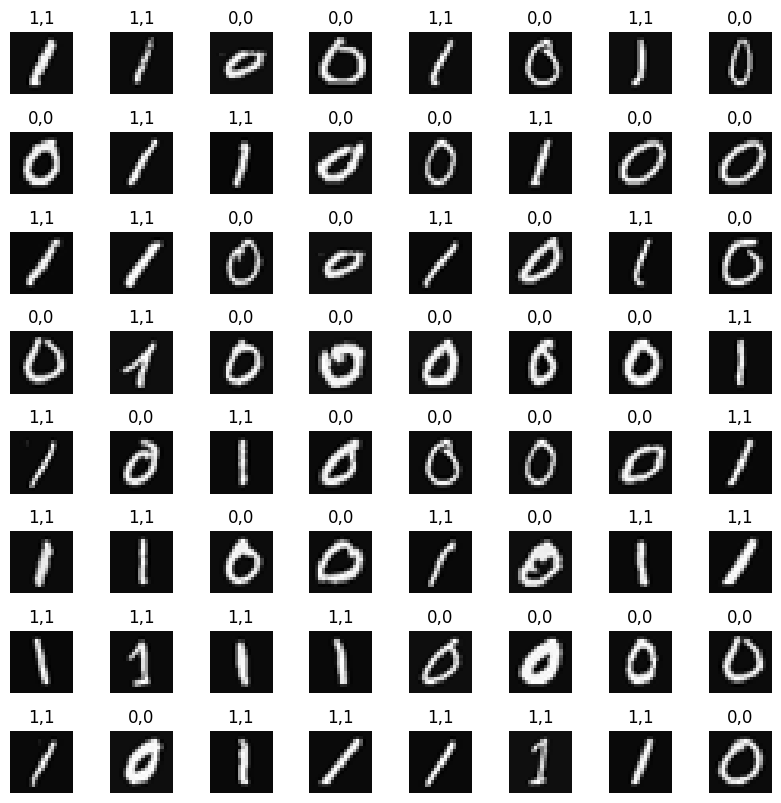

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    x_train = X_train[random_index]
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_train.reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(f"{y_train[random_index,0].astype(int)},{evaluate(W1, b1, W2, b2, x_train)}")
    ax.set_axis_off()